
# <center> Preparação e Classificação não supervisionada da grade celular </center>

<br/>

<div style="text-align: center;font-size: 90%;">
    Bruno Dias dos Santos<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Programa de Pós-Graduação em Computação Aplicada, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brasil
    <br/><br/>
    Contato: <div><a href="mailto:bruno.santos@inpe.br">bruno.santos@inpe.br</a></div>
    <br/><br/>
    Última atualização: 18 de Abril de 2022
</div>
<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Resumo.</b>  Este Notebook apresenta uma metodologia para tratar variáveis e posterior classificação não supervisionada  algoritmo <i> Agglomerative Clustering </i>. Dado uma tabela de arquivo shapefile (.shp) os atributos serão tratados a partir do preenchimento de valores faltantes e normalizados. Posteriormente, serão construidos modelos com o algoritmo não supervisionado.
</div>    

<br/>

### 1º Etapa: Tratamento e seleção de variáveis

Importação das bibliotecas:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import folium
import mapclassify
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from kmodes.kmodes import KModes

Leitura do shapefile e criação de um GeoDataFrame:

In [3]:
env = gpd.read_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\AMBIENTAL\\clusters_env_santarem.shp")

In [4]:
env

,ID,SN_MEAN,VN_MEAN,HND_MEAN,CA_Wa,CA_EG,CA_SV,CA_HV,PD_HV,C_AMB,C_ENV,geometry
0,1,-0.042412,0.803095,0.226024,-0.419488,-0.317700,0.859526,-0.679427,-0.829113,0,0,"POLYGON ((752288.177 9722818.283, 752288.612 9..."
1,2,0.385147,0.643596,-0.062881,-0.419488,-0.317700,0.849556,-0.679427,-0.829113,0,0,"POLYGON ((752388.360 9722817.848, 752388.795 9..."
2,3,0.768742,-0.268456,-0.468527,-0.419488,-0.317700,0.839590,-0.679427,-0.829113,0,0,"POLYGON ((752488.544 9722817.414, 752488.978 9..."
3,4,0.172079,-0.624968,-0.591165,-0.419488,-0.317700,0.829631,-0.679427,-0.829113,0,0,"POLYGON ((752588.727 9722816.980, 752589.162 9..."
4,5,-0.120413,-1.357845,-0.610032,-0.419488,0.341111,0.230008,-0.520606,-0.106338,0,0,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
13616,14651,-0.716772,0.176632,-0.718519,2.593800,-0.317700,-1.022291,-0.679427,-0.829113,5,5,"POLYGON ((752435.786 9733807.561, 752436.214 9..."
13617,14652,-0.875411,-0.133771,-0.817572,2.593803,-0.317700,-1.022291,-0.679427,-0.829113,5,5,"POLYGON ((752535.942 9733807.133, 752536.369 9..."
13618,14653,-0.975081,-0.078249,-0.817572,2.593807,-0.317700,-1.022291,-0.679427,-0.829113,5,5,"POLYGON ((752636.097 9733806.706, 752636.525 9..."
13619,14654,-0.852918,-0.007978,-0.753895,2.593811,-0.317700,-1.022291,-0.679427,-0.829113,5,5,"POLYGON ((752736.253 9733806.280, 752736.680 9..."


In [5]:
urb = gpd.read_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\MORFOLOGIA\\clusters_urb_santarem.shp")

In [6]:
urb

,ID,A_CON_MIN,CH_MAX,LCH5K_MEAN,CA_Ce,CA_HG,CA_FC,PERIOD,AREA_PERI,BUP_DENS,CA_Te,ASM_MAX,C_URB,geometry
0,5,-0.904887,7.657204,-0.565578,-0.182688,0.663551,-0.481669,-0.877458,0.668951,-1.259123,-0.947576,0.258129,0,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,-0.904887,7.657204,-0.567691,-0.273534,-0.372702,-0.737791,-0.877458,0.694571,-1.259110,-0.947576,-1.118395,0,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,-0.559015,-0.268752,-0.569704,-0.479358,-0.372702,-0.539551,-0.877458,0.747435,-1.259050,-0.947576,-0.237737,1,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,-0.559015,-0.269892,-0.569805,-0.479358,-0.372702,-0.760743,-0.877458,0.727739,-1.259021,-0.947576,2.392334,1,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,-0.586183,-0.270104,-0.569703,-0.479358,-0.372702,-0.356658,-0.877458,0.735039,-1.259008,-0.947576,1.261760,1,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,1.016402,-0.267912,-0.569805,-0.479358,-0.340505,-0.704990,-1.437618,-1.033767,-1.181086,-0.947576,-0.237737,1,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,1.023387,-0.270266,-0.569805,-0.479358,-0.372702,-0.171943,-1.507638,-1.026069,-0.976498,-0.947576,1.261760,1,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,1.023387,-0.270266,-0.569805,-0.479358,-0.372702,-0.798713,-1.507638,-1.038590,-1.286691,-0.947576,-0.063192,1,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,-0.913516,-0.270334,-0.569805,-0.479358,1.051430,-0.802306,-1.507638,-0.998392,-1.049142,-0.947576,0.400938,1,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


In [22]:
env = env[['ID','C_ENV']]

In [23]:
urb = urb[['ID', 'C_URB','geometry']]

Definicação da variável identificadora de cada feição:

In [24]:
indice = 'ID'

Criando uma base de dados que será utilizada na saída, copiando as informações do 'indice' e o 'TARGET' da base original:

In [70]:
geom = urb.merge(env, left_on=indice, right_on='ID', how='left')

In [71]:
geom

,ID,C_URB,geometry,C_ENV
0,5,0,"POLYGON ((752688.911 9722816.546, 752689.345 9...",0
1,6,0,"POLYGON ((752789.095 9722816.113, 752789.529 9...",2
2,10,1,"POLYGON ((753189.831 9722814.381, 753190.263 9...",1
3,11,1,"POLYGON ((753290.015 9722813.949, 753290.447 9...",1
4,12,1,"POLYGON ((753390.199 9722813.517, 753390.631 9...",0
...,...,...,...,...
6296,14338,1,"POLYGON ((751430.790 9733012.497, 751431.221 9...",5
6297,14339,1,"POLYGON ((751530.947 9733012.067, 751531.377 9...",5
6298,14340,1,"POLYGON ((751631.104 9733011.636, 751631.534 9...",5
6299,14392,1,"POLYGON ((751230.907 9733113.276, 751231.338 9...",5


<AxesSubplot: >

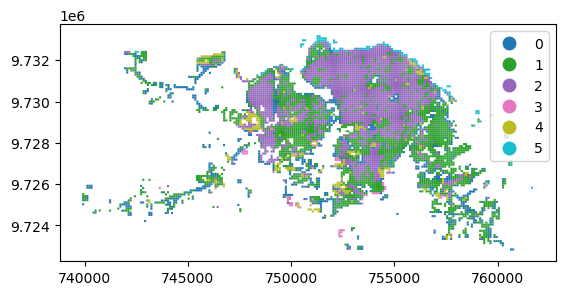

In [72]:
geom.plot(column= geom['C_ENV'], cmap='tab10',legend=True, categorical=True)

In [73]:
geom['C_ENV'].replace(4, 
           1, 
           inplace=True)

geom['C_ENV'].replace(3, 
           1, 
           inplace=True)

geom['C_ENV'].replace(0, 
           1, 
           inplace=True)

geom['C_ENV'].replace(5, 
           3, 
           inplace=True)

<AxesSubplot: >

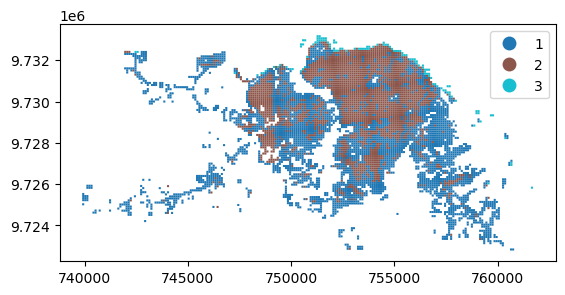

In [74]:
geom.plot(column= geom['C_ENV'], cmap='tab10',legend=True, categorical=True)

<AxesSubplot: >

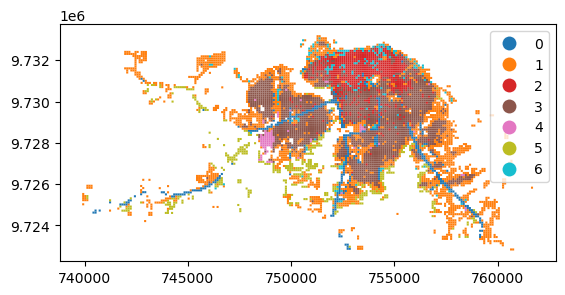

In [75]:
geom.plot(column= geom['C_URB'], cmap='tab10',legend=True, categorical=True)

In [76]:
geom['C_URB'].replace(6, 
           2, 
           inplace=True)

In [77]:
geom.columns

Index(['ID', 'C_URB', 'geometry', 'C_ENV'], dtype='object')

In [78]:
geom = geom[['ID','C_ENV', 'C_URB', 'geometry']]

<AxesSubplot: >

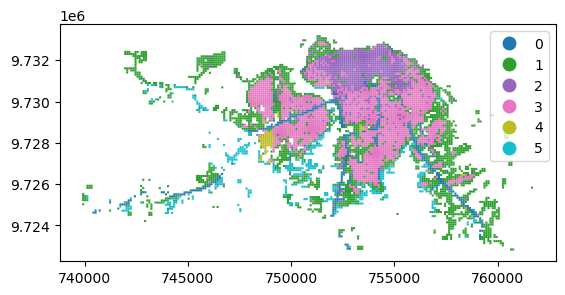

In [79]:
geom.plot(column= geom['C_URB'], cmap='tab10',legend=True, categorical=True)

### 2º Etapa: Classificação Não Supervisionada da Grade Celular

Criando uma base de dados com as variáveis para o processo de classificação não supervisionada:

In [80]:
dados = geom.iloc[:,1:-1].to_numpy()
dados

array([[1, 0],
       [2, 0],
       [1, 1],
       ...,
       [3, 1],
       [3, 1],
       [3, 1]], dtype=int64)

Gerando um gráfico de <i>dendrograma</i> para identificar um bom número de cluster no modelo <b>AC</b>:

In [82]:
km = KModes(n_clusters=12, init='Huang', n_init=300, verbose=1)
km.fit_predict(dados)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 423.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 725.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 148.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 232, cost: 725.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 3, cost: 224.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, move

Run 62, iteration: 2/100, moves: 0, cost: 374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 63, iteration: 1/100, moves: 20, cost: 255.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 64, iteration: 1/100, moves: 125, cost: 148.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 65, iteration: 1/100, moves: 0, cost: 1620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 66, iteration: 1/100, moves: 3, cost: 395.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 67, iteration: 1/100, moves: 0, cost: 40.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 68, iteration: 1/100, moves: 3, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 69, iteration: 1/100, moves: 0, cost: 318.0
Init: initializing centroids
Init: initializing clust

Init: initializing clusters
Starting iterations...
Run 124, iteration: 1/100, moves: 23, cost: 148.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 125, iteration: 1/100, moves: 27, cost: 262.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 126, iteration: 1/100, moves: 3, cost: 145.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 127, iteration: 1/100, moves: 0, cost: 496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 128, iteration: 1/100, moves: 0, cost: 964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 129, iteration: 1/100, moves: 0, cost: 1186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 130, iteration: 1/100, moves: 76, cost: 93.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 131, iteration: 1/100, moves: 0, cost: 

Run 186, iteration: 1/100, moves: 20, cost: 127.0
Run 186, iteration: 2/100, moves: 0, cost: 127.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 187, iteration: 1/100, moves: 125, cost: 440.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 188, iteration: 1/100, moves: 0, cost: 947.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 189, iteration: 1/100, moves: 3, cost: 971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 190, iteration: 1/100, moves: 729, cost: 144.0
Run 190, iteration: 2/100, moves: 17, cost: 144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 191, iteration: 1/100, moves: 0, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 192, iteration: 1/100, moves: 23, cost: 120.0
Init: initializing centroids
Init: initializing clusters
Starting iterat

Init: initializing clusters
Starting iterations...
Run 247, iteration: 1/100, moves: 0, cost: 147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 248, iteration: 1/100, moves: 3, cost: 148.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 249, iteration: 1/100, moves: 20, cost: 752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 250, iteration: 1/100, moves: 3, cost: 371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 251, iteration: 1/100, moves: 0, cost: 318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 252, iteration: 1/100, moves: 27, cost: 520.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 253, iteration: 1/100, moves: 0, cost: 318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 254, iteration: 1/100, moves: 3, cost: 1

array([10,  4,  5, ...,  0,  0,  0], dtype=uint16)

Visualizando a quantidade de feições em cada cluster:

In [84]:
unique, counts = np.unique(km.labels_, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[   0  120]
 [   1  888]
 [   2   27]
 [   3  729]
 [   4  125]
 [   5 1924]
 [   6   73]
 [   7 1291]
 [   8  124]
 [   9  473]
 [  10  295]
 [  11  232]]


Incluindo o resultado do modelo <b>AC</b> na base de dados:

In [94]:
geom['C_ENV_URB'] = km.labels_

C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Visualizando um mapa simples com os clusters do modelo <b>AC</b>:

<AxesSubplot: >

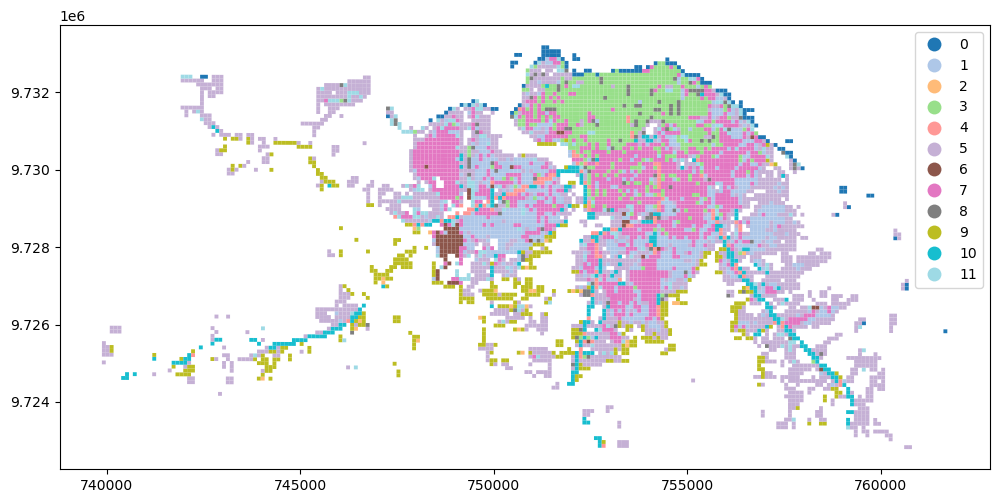

In [95]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))
geom.plot(column= geom['C_ENV_URB'], legend=True, categorical=True, cmap = 'tab20',  ax=ax)

In [96]:
geom['C_ENV_URB'].replace(10, 
           4, 
           inplace=True)

geom['C_ENV_URB'].replace(11, 
           2, 
           inplace=True)

geom['C_ENV_URB'].replace(9, 
           2, 
           inplace=True)

geom['C_ENV_URB'].replace(5, 
           2, 
           inplace=True)

geom['C_ENV_URB'].replace(10, 
           4, 
           inplace=True)

geom['C_ENV_URB'].replace(8, 
           1, 
           inplace=True)

geom['C_ENV_URB'].replace(7, 5, inplace=True) #APENAS PARA ADEQUAR O NOME

C:\Users\brdia\AppData\Local\Temp\ipykernel_28268\3907461858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geom['C_ENV_URB'].replace(10,
C:\Users\brdia\AppData\Local\Temp\ipykernel_28268\3907461858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geom['C_ENV_URB'].replace(11,
C:\Users\brdia\AppData\Local\Temp\ipykernel_28268\3907461858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geom['C_ENV_URB'].replace(9,
C:\Users\br

<AxesSubplot: >

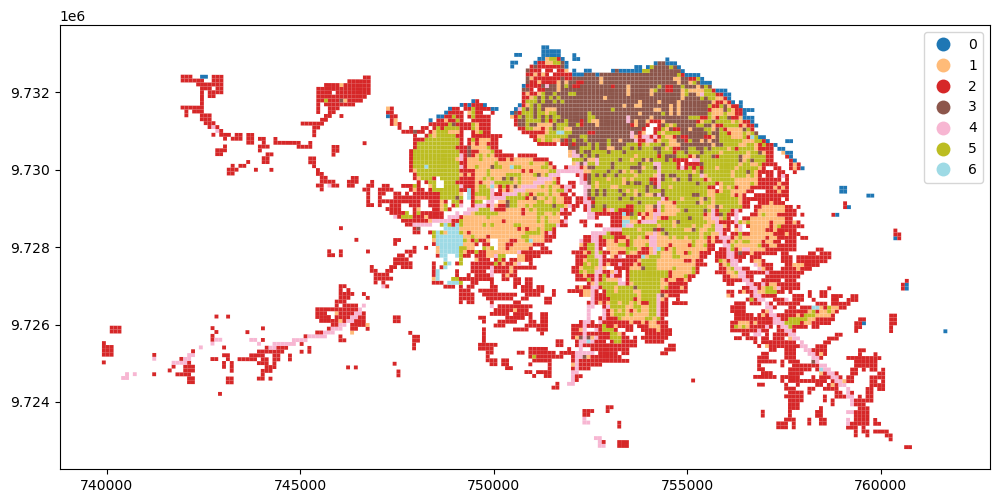

In [97]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))
geom.plot(column= geom['C_ENV_URB'], legend=True, categorical=True, cmap = 'tab20',  ax=ax)

In [98]:
geom.to_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\CLUSTERS_AMB_URB\\clusters_env_urb_santarem.shp")

Visualizando a base de dados e exportando uma chamada shapefile com as informações:

In [53]:
geom

,id,HC_4,HC_9,geometry,umars_12
0,162,2,2,"POLYGON ((663963.865 9749184.276, 663962.366 9...",7
1,165,0,2,"POLYGON ((664264.045 9749188.765, 664262.546 9...",7
2,166,2,2,"POLYGON ((664364.106 9749190.262, 664362.606 9...",7
3,177,3,2,"POLYGON ((665464.771 9749206.746, 665463.269 9...",0
4,205,3,2,"POLYGON ((668266.483 9749248.847, 668264.973 9...",0
...,...,...,...,...,...
1369,4519,2,2,"POLYGON ((666473.545 9755317.952, 666472.038 9...",7
1370,4535,2,3,"POLYGON ((668074.271 9755342.071, 668072.759 9...",4
1371,4536,2,3,"POLYGON ((668174.317 9755343.581, 668172.805 9...",4
1372,4537,0,2,"POLYGON ((668274.362 9755345.091, 668272.850 9...",7


In [55]:
geom.columns = ['ID', 'AMB', 'MORF', 'geometry', 'UMARS']

In [56]:
geom = geom[['ID', 'AMB', 'MORF','UMARS', 'geometry']]

In [140]:
df = geom.iloc[:,:-1]

In [141]:
df

,ID,AMB,MORF,UMARS
0,162,2,2,7
1,165,0,2,7
2,166,2,2,7
3,177,3,2,0
4,205,3,2,0
...,...,...,...,...
1369,4519,2,2,7
1370,4535,2,3,4
1371,4536,2,3,4
1372,4537,0,2,7


In [150]:
grupos = (df.groupby(['AMB', 'MORF','UMARS']).count().dropna().reset_index())

In [151]:
grupos

,AMB,MORF,UMARS,ID
0,0,0,5,70
1,0,1,1,228
2,0,2,7,217
3,0,3,4,43
4,0,4,3,98
5,0,5,2,28
6,1,0,3,1
7,1,1,1,33
8,1,2,6,168
9,1,3,3,17


In [152]:
grupos.to_excel("D:\\00_inpe\\0_dissertacao\\validacao\\3_umars\\alluvial_cameta.xlsx")

In [57]:
geom.explore(column="UMARS", tooltip="UMARS",tiles='cartodbpositron',
             categorical = True, style_kwds=dict(color="grey", weight=0.01, fillOpacity = 0.7))

In [135]:
geom.to_file("D:\\00_inpe\\0_dissertacao\\validacao\\3_umars\\clusters_umars_cameta.shp")